# Getting data from the web: API

### NYTimes API


In [2]:
import requests

Setting things up for authentication:
* Sign in to the developer page (developer.nytimes.com)
* Select Apps under username
* Select the App you've created
* Copy the key into a file and assign it as a string to a variable name
* Use that key here by importing the module (your *.py file) which contains simply the variable you've defined to store your key

In [4]:
import nytimeskey

How do you know how to use the API?
* Consult the documentation
  * Article search -- see https://developer.nytimes.com/docs/articlesearch-product/1/overview
    * `/articlesearch.json?q={query}&fq={filter}`
    * Example:
      * `https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key=yourkey`
  * Books API -- see https://developer.nytimes.com/docs/books-product/1/overview
    * `/lists/2019-01-20/hardcover-fiction.json`
    * Example:
      * `https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key=yourkey`
    * "The book reviews service lets you get NYT book review by author, ISBN, or title."
      * `https://api.nytimes.com/svc/books/v3/reviews.json?author=Stephen+King&api-key=yourkey`


Let's try the Books first:

In [106]:
# Note how we include your key without explicitly typing it into this file

url = 'https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key=' + nytimeskey.MY_KEY

In [107]:
print(url)

https://api.nytimes.com/svc/books/v3/lists/current/hardcover-fiction.json?api-key=SMexr1jzRAhVU6GxQG9F4fu83LfysH6r


Use "requests" to query the API endpoint

In [108]:
response = requests.get(url)

In [109]:
response

<Response [200]>

In [110]:
response.text

'{"status":"OK","copyright":"Copyright (c) 2022 The New York Times Company.  All Rights Reserved.","num_results":15,"last_modified":"2022-01-27T18:18:42-05:00","results":{"list_name":"Hardcover Fiction","list_name_encoded":"hardcover-fiction","bestsellers_date":"2022-01-22","published_date":"2022-02-06","published_date_description":"latest","next_published_date":"","previous_published_date":"2022-01-30","display_name":"Hardcover Fiction","normal_list_ends_at":15,"updated":"WEEKLY","books":[{"rank":1,"rank_last_week":7,"weeks_on_list":59,"asterisk":0,"dagger":0,"primary_isbn10":"0525559477","primary_isbn13":"9780525559474","publisher":"Viking","description":"Nora Seed finds a library beyond the edge of the universe that contains books with multiple possibilities of the lives one could have lived.","price":"0.00","title":"THE MIDNIGHT LIBRARY","author":"Matt Haig","contributor":"by Matt Haig","contributor_note":"","book_image":"https:\\/\\/storage.googleapis.com\\/du-prd\\/books\\/images

Actually.... the response is in JSON format

In [111]:
x = response.json()

In [112]:
x

{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company.  All Rights Reserved.',
 'num_results': 15,
 'last_modified': '2022-01-27T18:18:42-05:00',
 'results': {'list_name': 'Hardcover Fiction',
  'list_name_encoded': 'hardcover-fiction',
  'bestsellers_date': '2022-01-22',
  'published_date': '2022-02-06',
  'published_date_description': 'latest',
  'next_published_date': '',
  'previous_published_date': '2022-01-30',
  'display_name': 'Hardcover Fiction',
  'normal_list_ends_at': 15,
  'updated': 'WEEKLY',
  'books': [{'rank': 1,
    'rank_last_week': 7,
    'weeks_on_list': 59,
    'asterisk': 0,
    'dagger': 0,
    'primary_isbn10': '0525559477',
    'primary_isbn13': '9780525559474',
    'publisher': 'Viking',
    'description': 'Nora Seed finds a library beyond the edge of the universe that contains books with multiple possibilities of the lives one could have lived.',
    'price': '0.00',
    'title': 'THE MIDNIGHT LIBRARY',
    'author': 'Matt Haig',
    

Navigating this data structure may remind you of experiences navigating the nasty CORGIS lists of nested dictionaries.

In [113]:
x.keys()

dict_keys(['status', 'copyright', 'num_results', 'last_modified', 'results'])

In [114]:
x['results'].keys()

dict_keys(['list_name', 'list_name_encoded', 'bestsellers_date', 'published_date', 'published_date_description', 'next_published_date', 'previous_published_date', 'display_name', 'normal_list_ends_at', 'updated', 'books', 'corrections'])

In [116]:
x['results']['books'][0]

{'rank': 1,
 'rank_last_week': 7,
 'weeks_on_list': 59,
 'asterisk': 0,
 'dagger': 0,
 'primary_isbn10': '0525559477',
 'primary_isbn13': '9780525559474',
 'publisher': 'Viking',
 'description': 'Nora Seed finds a library beyond the edge of the universe that contains books with multiple possibilities of the lives one could have lived.',
 'price': '0.00',
 'title': 'THE MIDNIGHT LIBRARY',
 'author': 'Matt Haig',
 'contributor': 'by Matt Haig',
 'contributor_note': '',
 'book_image': 'https://storage.googleapis.com/du-prd/books/images/9780525559474.jpg',
 'book_image_width': 331,
 'book_image_height': 500,
 'amazon_product_url': 'https://www.amazon.com/dp/0525559477?tag=NYTBSREV-20',
 'age_group': '',
 'book_review_link': '',
 'first_chapter_link': '',
 'sunday_review_link': '',
 'article_chapter_link': '',
 'isbns': [{'isbn10': '0525559477', 'isbn13': '9780525559474'},
  {'isbn10': '0525559485', 'isbn13': '9780525559481'},
  {'isbn10': '0655697071', 'isbn13': '9780655697077'}],
 'buy_li

In [118]:
for i in x['results']['books']:
    print('Author: ' + i['author'] + ', Title: ' + i['title'])

Author: Matt Haig, Title: THE MIDNIGHT LIBRARY
Author: Nita Prose, Title: THE MAID
Author: Amor Towles, Title: THE LINCOLN HIGHWAY
Author: James Patterson and Mike Lupica, Title: THE HORSEWOMAN
Author: Lisa Gardner, Title: ONE STEP TOO FAR
Author: Laura Dave, Title: THE LAST THING HE TOLD ME
Author: John Grisham, Title: THE JUDGE'S LIST
Author: Mitch Albom, Title: THE STRANGER IN THE LIFEBOAT
Author: Jodi Picoult, Title: WISH YOU WERE HERE
Author: Hanya Yanagihara, Title: TO PARADISE
Author: Amanda Gorman, Title: CALL US WHAT WE CARRY
Author: Anthony Doerr, Title: CLOUD CUCKOO LAND
Author: Elizabeth George, Title: SOMETHING TO HIDE
Author: Nicholas Sparks, Title: THE WISH
Author: Diana Gabaldon, Title: GO TELL THE BEES THAT I AM GONE


### Example 2: Get a review of a book above

In [119]:
# Note how we include your key without explicitly typing it into this file

url = 'https://api.nytimes.com/svc/books/v3/reviews.json?title=GO+TELL+THE+BEES+THAT+I+AM+GONE&api-key=' + nytimeskey.MY_KEY

In [120]:
print(url)

https://api.nytimes.com/svc/books/v3/reviews.json?title=GO+TELL+THE+BEES+THAT+I+AM+GONE&api-key=SMexr1jzRAhVU6GxQG9F4fu83LfysH6r


Use "requests" to query the API endpoint

In [121]:
response = requests.get(url)

In [124]:
response.json()

{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company.  All Rights Reserved.',
 'num_results': 0,
 'results': []}

No result.  Try again.

In [126]:
url = 'https://api.nytimes.com/svc/books/v3/reviews.json?title=THE+MIDNIGHT+LIBRARY&api-key=' + nytimeskey.MY_KEY
response = requests.get(url)
x = response.json()
x

{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company.  All Rights Reserved.',
 'num_results': 2,
 'results': [{'url': 'https://www.nytimes.com/2020/09/29/books/review/matt-haig-the-midnight-library.html',
   'publication_dt': '2020-09-29',
   'byline': 'Karen Joy Fowler',
   'book_title': 'The Midnight Library',
   'book_author': 'Matt Haig',
   'summary': 'Matt Haig provides a fresh literary twist on the “Sliding Doors” phenomenon.',
   'uuid': '00000000-0000-0000-0000-000000000000',
   'uri': 'nyt://book/00000000-0000-0000-0000-000000000000',
   'isbn13': ['9780525559474']},
  {'url': 'https://www.nytimes.com/2020/09/29/books/review/the-midnight-library-by-matt-haig-an-excerpt.html',
   'publication_dt': '2020-09-29',
   'byline': '',
   'book_title': 'The Midnight Library',
   'book_author': 'Matt Haig',
   'summary': 'An excerpt from “The Midnight Library,” by Matt Haig',
   'uuid': '00000000-0000-0000-0000-000000000000',
   'uri': 'nyt://book/00000000-0000

* It doesn't look like the API allows us to actually retrieve the review itself
* BUT, we're now fully capable of getting that ourselves with the URL
* -> Grab the review with requests
* -> Use BeautifulSoup to help us sort through all the HTML tags

**However**, this is disallowed under the [Terms of Service](https://help.nytimes.com/hc/en-us/articles/115014893428-Terms-of-service).  If you wanted to do this, you should seek written permission from the NYTimes.

## Article search

The NYTimes has a number of different APIs.  Let's repeat the process with the Article Search.

In [26]:
url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=spotify&api-key=' + nytimeskey.MY_KEY

In [27]:
print(url)

https://api.nytimes.com/svc/search/v2/articlesearch.json?q=spotify&api-key=SMexr1jzRAhVU6GxQG9F4fu83LfysH6r


In [28]:
response = requests.get(url)

In [29]:
response

<Response [200]>

In [30]:
response.text

'{"status":"OK","copyright":"Copyright (c) 2022 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"Without real streaming alternatives around, a musician’s move to shame Spotify is doomed to failure.","web_url":"https://www.nytimes.com/2022/01/27/opinion/neil-young-spotify-rogan.html","snippet":"Without real streaming alternatives around, a musician’s move to shame Spotify is doomed to failure.","lead_paragraph":"It’s no surprise to me that the singer-songwriter Neil Young followed through on his threat to pull his music from Spotify in protest of the Covid misinformation spouted by that streaming service’s brightest star, Joe Rogan.","source":"The New York Times","multimedia":[{"rank":0,"subtype":"xlarge","caption":null,"credit":null,"type":"image","url":"images/2022/01/27/opinion/27Swisher-image/27Swisher-image-articleLarge.jpg","height":600,"width":600,"legacy":{"xlarge":"images/2022/01/27/opinion/27Swisher-image/27Swisher-image-articleLarge.jpg","xla

Actually.... the response is in JSON format

In [31]:
x = response.json()

In [32]:
x.keys()

dict_keys(['status', 'copyright', 'response'])

In [33]:
len(x['response']['docs'])

10

In [34]:
x['response']['docs'][0].keys()

dict_keys(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

In [35]:
for i in x['response']['docs']:
    print(i['headline'])

{'main': 'Neil Young Says ‘No More’ to Spotify', 'kicker': 'Kara Swisher', 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
{'main': 'Neil Young posts and removes a letter demanding Spotify remove his music.', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
{'main': 'Joni Mitchell Plans to Follow Neil Young Off Spotify, Citing ‘Lies’', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
{'main': 'Spotify Responds to Complaints About Covid Misinformation', 'kicker': None, 'content_kicker': None, 'print_headline': None, 'name': None, 'seo': None, 'sub': None}
{'main': 'Spotify Is Removing Neil Young Songs After He Complains of ‘Misinformation’', 'kicker': None, 'content_kicker': None, 'print_headline': 'Spotify Removes Neil Young Songs in Covid Dispute', 'name': None, 'seo': None, 'sub': None}
{'main': 'Robinhood’s Meme-Stock Hangover', 'kicke

In [36]:
for i in x['response']['docs']:
    print(i['headline']['main'])

Neil Young Says ‘No More’ to Spotify
Neil Young posts and removes a letter demanding Spotify remove his music.
Joni Mitchell Plans to Follow Neil Young Off Spotify, Citing ‘Lies’
Spotify Responds to Complaints About Covid Misinformation
Spotify Is Removing Neil Young Songs After He Complains of ‘Misinformation’
Robinhood’s Meme-Stock Hangover
Medical professionals urge Spotify to crack down on Covid misinformation.
Wallice, an Indie Pop Sensation from Los Angeles
Election Falsehoods Surged on Podcasts Before Capitol Riots, Researchers Find
When Did Spotify Wrapped Get So Chatty?


## Hmmm.... trouble in Spotify-land?

Go to spotify and we're going to do similar steps to get our credentials

https://developer.spotify.com/dashboard/login

In [38]:
# spotipy is actually not installed on the JupyterHub
# this executes a shell command to install spotipy in your local set of Python packages
# be forewarned that this package may disappear between your sessions
!pip install spotipy

  Using cached spotipy-2.19.0-py3-none-any.whl (27 kB)


In [39]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [40]:
import spotifykey

In [41]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=spotifykey.CLIENT_ID,
                                                           client_secret=spotifykey.CLIENT_SECRET))

In [62]:
results = sp.search(q='Neil Young', limit=20)

In [63]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Neil+Young&type=track&offset=0&limit=20',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0Kpf7PvEotzvndPhYwwZzb'},
       'href': 'https://api.spotify.com/v1/artists/0Kpf7PvEotzvndPhYwwZzb',
       'id': '0Kpf7PvEotzvndPhYwwZzb',
       'name': 'The Ophelias',
       'type': 'artist',
       'uri': 'spotify:artist:0Kpf7PvEotzvndPhYwwZzb'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG',
      'BH',
      'BI',
      'BJ',
      'BN',
      'BO',
      'BR',
      'BS',
      'BT',
      'BW',
      'BY',
      'BZ',
      'CA',
      'CD',
      'CG',
      'CH',
      'CI',
      'CL',
      'CM',
      'CO',
      'CR',
      'CV',
      'CW',
      'CY',
      'CZ',
      'DE',
   

Sometimes it's like trying to drink water from a firehose.

### How do I know how to do the above code in the first place?

It can be VERY important and helpful to consult the documentation.

Check out: https://developer.spotify.com/documentation/web-api/
* Notice that they give descriptions of the response codes
* Look for Guides, References, Documentation, Libraries, etc.

Guidance as to Web API Libraries: https://developer.spotify.com/documentation/web-api/libraries/
* Find Spotipy

And there is documentation in turn for libraries like spotipy: https://spotipy.readthedocs.io/en/2.19.0/
* Installation
* Examples
* Reference
* Link to source code
  * GitHub repos can themselves contain useful documentation on the main README
  * ... not that we want to overburden ourselves with Python, but note that you can even peruse source code if you want
    * https://github.com/plamere/spotipy/blob/2.19.0/spotipy/client.py
    * note the use of requests and json (and something called "urllib3" -> requests is built on urllib3 and intended to make HTTP requests more painless)

In [94]:
# Let's put our CORGIS work with lists and nested dictionaries to good use

results.keys()

dict_keys(['tracks'])

In [95]:
results['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [96]:
results['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [97]:
print(results['tracks']['items'][0]['album']['name'])
print(results['tracks']['items'][0]['artists'])
print(results['tracks']['items'][0]['popularity'])

Neil Young on High
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/0Kpf7PvEotzvndPhYwwZzb'}, 'href': 'https://api.spotify.com/v1/artists/0Kpf7PvEotzvndPhYwwZzb', 'id': '0Kpf7PvEotzvndPhYwwZzb', 'name': 'The Ophelias', 'type': 'artist', 'uri': 'spotify:artist:0Kpf7PvEotzvndPhYwwZzb'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/12zbUHbPHL5DGuJtiUfsip'}, 'href': 'https://api.spotify.com/v1/artists/12zbUHbPHL5DGuJtiUfsip', 'id': '12zbUHbPHL5DGuJtiUfsip', 'name': 'Julien Baker', 'type': 'artist', 'uri': 'spotify:artist:12zbUHbPHL5DGuJtiUfsip'}]
38


In [80]:
results = sp.search(q='Neil Young', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'])

0 Neil Young on High
1 My Back Pages - Live at Madison Square Garden, New York, NY - October 1992
2 Philadelphia (From "Philadelphia")
3 Journey Through the Past
4 Helpless (feat. Neil Young) - Concert Version
5 Neil Young
6 All Along the Watchtower - Live at Madison Square Garden, New York, NY - October 1992
7 Neil Young
8 Campfire (with DRAM & Neil Young)
9 Neil Young
10 Neil Young Sings "Fresh Prince of Bel-Air"
11 Neil Young
12 Neil Young
13 Birds - Demo
14 Neil Young on High
15 Neil Young
16 The Needle and The Damage Done - Live at John F. Kennedy Stadium, 13th July 1985
17 Neil Young
18 Just Like Tom Thumb's Blues - Live at Madison Square Garden, New York, NY - October 1992
19 Neil Young


In [81]:
results = sp.search(q='Neil Young', limit=20)
for idx, track in enumerate(results['tracks']['items']):
    print(idx, track['name'], ' : ', track['artists'][0]['name'])

0 Neil Young on High  :  The Ophelias
1 My Back Pages - Live at Madison Square Garden, New York, NY - October 1992  :  Bob Dylan
2 Philadelphia (From "Philadelphia")  :  Neil Young
3 Journey Through the Past  :  Neil Young
4 Helpless (feat. Neil Young) - Concert Version  :  The Band
5 Neil Young  :  Danny Schmidt
6 All Along the Watchtower - Live at Madison Square Garden, New York, NY - October 1992  :  Neil Young
7 Neil Young  :  Poco
8 Campfire (with DRAM & Neil Young)  :  Shelley FKA DRAM
9 Neil Young  :  Los eternos
10 Neil Young Sings "Fresh Prince of Bel-Air"  :  Jimmy Fallon
11 Neil Young  :  Gabrielle
12 Neil Young  :  Stroke 9
13 Birds - Demo  :  Neil Young
14 Neil Young on High  :  The Ophelias
15 Neil Young  :  Gabrielle
16 The Needle and The Damage Done - Live at John F. Kennedy Stadium, 13th July 1985  :  Neil Young
17 Neil Young  :  Trent Dabbs
18 Just Like Tom Thumb's Blues - Live at Madison Square Garden, New York, NY - October 1992  :  Neil Young
19 Neil Young  :  Will

As long as you can traverse this data structure, then you can collect information from every item that is returned into something a little more manageable.... like a Pandas dataframe.

### Example: Simple data on songs from the 70's
* Search for songs from the 70's
* Make lists of info
* Make a Pandas dataframe with one column for each list you've collected

In [104]:
artist_name = []
track_name = []
popularity = []
track_id = []

# Search for 50 songs from 1970
track_results = sp.search(q='year:1970', type='track', limit=50)

# Use a for loop to iterate over the track items
# and add the artist name, track name, popularity score, and track ID to lists
for i in track_results['tracks']['items']:
    artist_name.append(i['artists'][0]['name'])
    track_name.append(i['name'])
    track_id.append(i['id'])
    popularity.append(i['popularity'])

Import pandas and convert those lists into columns of a dataframe

In [105]:
import pandas as pd

In [100]:
track_dataframe = pd.DataFrame({'artist_name' : artist_name,
                                'track_name' : track_name,
                                'track_id' : track_id,
                                'popularity' : popularity})

In [101]:
print(track_dataframe.shape)
track_dataframe.head()

(50, 4)


,artist_name,track_name,track_id,popularity
0,Edison Lighthouse,Love Grows (Where My Rosemary Goes),5Ts1DYOuouQLgzTaisxWYh,86
1,The Jackson 5,Santa Claus Is Coming To Town,2QpN1ZVw8eJO5f7WcvUA1k,79
2,Creedence Clearwater Revival,Have You Ever Seen The Rain,5DnT9a5IM3eMjKgXTWVJvi,73
3,Led Zeppelin,Immigrant Song - Remaster,78lgmZwycJ3nzsdgmPPGNx,79
4,Black Sabbath,Paranoid - 2012 - Remaster,1Y373MqadDRtclJNdnUXVc,72


Use the dataframe now as an easier structure to navigate and analyze.

In [102]:
track_dataframe.sort_values(by='popularity')

,artist_name,track_name,track_id,popularity
41,Grateful Dead,Casey Jones - 2013 Remaster,7LbfuQVct78YoghmoPtsQ8,62
44,Conway Twitty,Hello Darlin',6vmAgl2y9MpoZKrVUXrPe5,63
40,James Gang,Funk #49,5h6SovHOYpIMlAkafxcbq3,64
33,Grateful Dead,Friend of the Devil,5ZLzl6T8JwqMTMdoE0nCbU,64
45,The Guess Who,American Woman,3LQPTJEqOfljGBxmpgUnoC,65
43,Badfinger,No Matter What - Remastered 2010,0zK545STj6P7qbFSpCK9pp,65
23,Black Sabbath,War Pigs / Luke's Wall - 2012 - Remaster,2rd9ETlulTbz6BYZcdvIE1,65
32,Chicago,25 or 6 to 4 - 2002 Remaster,7GqIDx2QVGOpd4r1fZaUUW,66
21,The Jackson 5,ABC,6wDviYDtmSDZ0S6TVMM9Vc,66
24,Three Dog Night,Mama Told Me (Not To Come) - Single Version,1CAO7hiNOxJRPW4nFv2aRO,67


<AxesSubplot:ylabel='artist_name'>

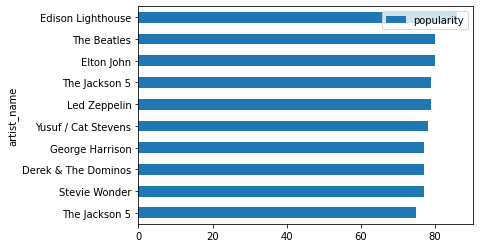

In [103]:
track_dataframe.sort_values(by='popularity')[-10:].plot.barh(x='artist_name',y='popularity')

## You now know some spotipy specifics
Try looking through spotipy's [example code](https://github.com/plamere/spotipy/tree/2.19.0/examples) in their GitHub repository and try one here that interests you